In [97]:
from libaries import *
from data_loading import findFiles,LoadDataSignals
from global_parameters import *
from peak_to_peak_detection import *
from Data_Denoising.data_denoising import *
from Data_Denoising.time_synchronization import *
from Data_Denoising.moving_average_filter import *
from Data_Denoising.derivative_filtering import *
from Data_Denoising.derivative_filtering import apply_improved_derivative_filter


#### Extract relevant files for processing


In [98]:
expected_waveform="sin"
expected_periods="9"
unique_file_list= findFiles(expected_waveform,expected_periods,sample_number=1)


#### Data Loading

In [99]:
raw,Concentration,actual_waveform,periods=LoadDataSignals(unique_file_list[0],time_axis_start=0,time_axis_end=16000)
raw.shape



(100, 2, 16000)

#### Time Synchronized Averaging (Experiments=100)

In [100]:
averaged_signal=time_synchronized_averaging(raw,threshold=500000)

DC Offset Remval (100, 2, 16000)
Raw After Null Experiments Removal:  (40, 2, 16000)


In [101]:
averaged_signal.shape

(1, 16000)

#### Moving Average

In [102]:
# Apply the Hanning filter from the slide
filtered_hanning = apply_hanning_filter(raw, trial_idx=0)

In [103]:
# Print shape to verify
print("Hanning filter (slide) shape:", filtered_hanning.shape) 

Hanning filter (slide) shape: (1, 16000)


In [104]:
filtered_uniform_moving_avg=apply_uniform_moving_average_filter(raw, trial_idx=0, window_size=11)

In [105]:
filtered_uniform_moving_avg.shape

(1, 16000)

In [106]:
filtered_derivative=apply_improved_derivative_filter(raw, channel=1, T=1.0)
#filtered_derivative=apply_uniform_moving_average_filter(filtered_derivative, trial_idx=0, window_size=11)

In [107]:
filtered_derivative.shape

(100, 2, 16000)

#### Data Plotting (For Testing)

In [108]:
"""buffer = 50
for i in range(raw.shape[0]):
    current_ref_point = reference_points[i]
    if  current_ref_point != 0 :
        time_range=np.arange(current_ref_point - buffer,current_ref_point + buffer)
        plt.plot(time_range,raw[i,1,current_ref_point - buffer:current_ref_point + buffer])
        plt.scatter(current_ref_point , raw[i,1,current_ref_point])
        plt.show()
        """

'buffer = 50\nfor i in range(raw.shape[0]):\n    current_ref_point = reference_points[i]\n    if  current_ref_point != 0 :\n        time_range=np.arange(current_ref_point - buffer,current_ref_point + buffer)\n        plt.plot(time_range,raw[i,1,current_ref_point - buffer:current_ref_point + buffer])\n        plt.scatter(current_ref_point , raw[i,1,current_ref_point])\n        plt.show()\n        '

In [109]:
start=8000
end=8200

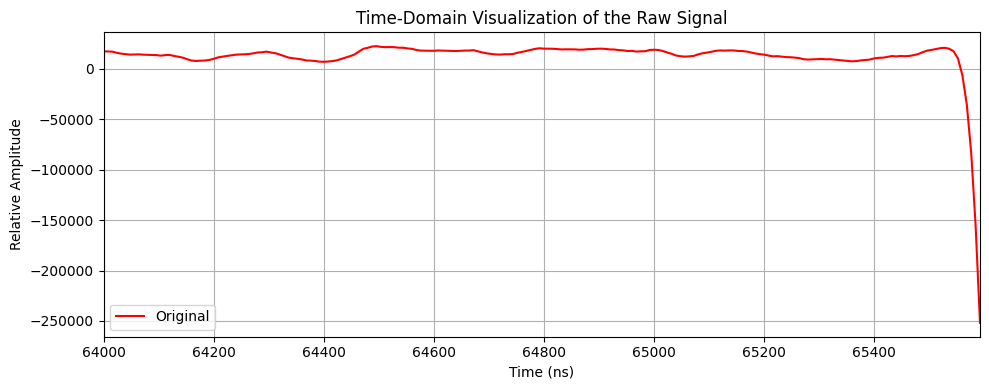

In [110]:
Fs = 125e6  # 125 MHz
Ts_ns = 1e9 / Fs  # Sampling period in nanoseconds

time_ns = np.arange(start, end) * Ts_ns

plt.figure(figsize=(10, 4))
plt.plot(time_ns, raw[0,1,start:end], label='Original', color='red')
plt.title('Time-Domain Visualization of the Raw Signal')
plt.xlabel('Time (ns)')
plt.ylabel('Relative Amplitude')
plt.legend()
plt.grid(True)
plt.xlim(time_ns[0], time_ns[-1])

plt.tight_layout()
plt.show()


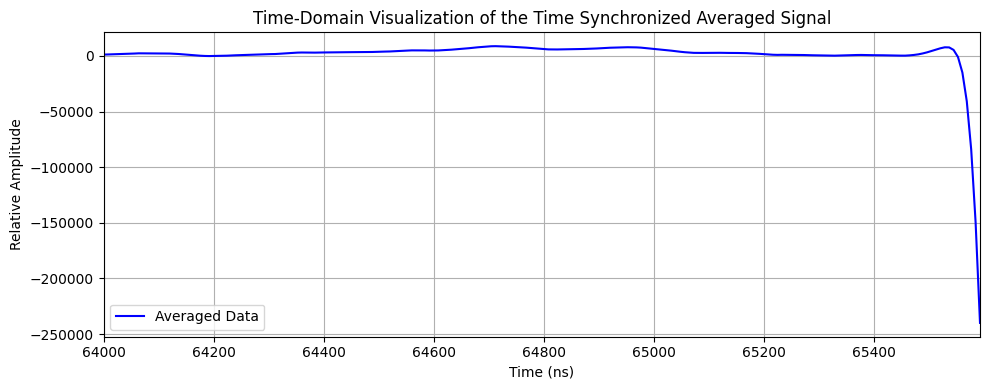

In [111]:


Fs = 125e6  # 125 MHz
Ts_ns = 1e9 / Fs  # Sampling period in nanoseconds

time_ns = np.arange(start, end) * Ts_ns

plt.figure(figsize=(10, 4))
plt.plot(time_ns, averaged_signal[0][start:end], label='Averaged Data', color='blue')
plt.title('Time-Domain Visualization of the Time Synchronized Averaged Signal')
plt.xlabel('Time (ns)')
plt.ylabel('Relative Amplitude')
plt.legend()
plt.grid(True)
plt.xlim(time_ns[0], time_ns[-1])

plt.tight_layout()
plt.show()



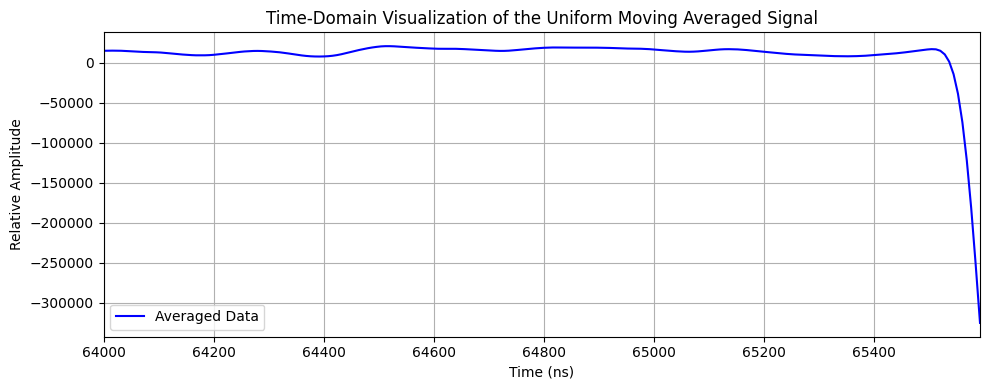

In [112]:
Fs = 125e6  # 125 MHz
Ts_ns = 1e9 / Fs  # Sampling period in nanoseconds

time_ns = np.arange(start, end) * Ts_ns

plt.figure(figsize=(10, 4))
plt.plot(time_ns, filtered_uniform_moving_avg[0][start:end], label='Averaged Data', color='blue')
plt.title('Time-Domain Visualization of the Uniform Moving Averaged Signal')
plt.xlabel('Time (ns)')
plt.ylabel('Relative Amplitude')
plt.legend()
plt.grid(True)
plt.xlim(time_ns[0], time_ns[-1])

plt.tight_layout()
plt.show()



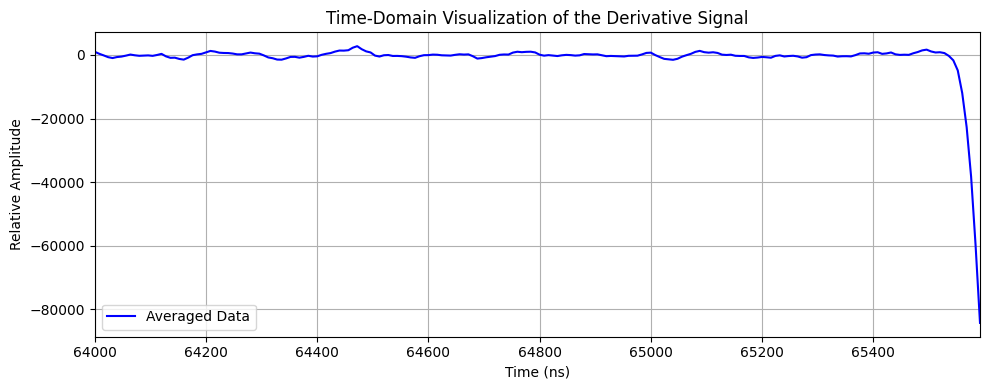

In [113]:
Fs = 125e6  # 125 MHz
Ts_ns = 1e9 / Fs  # Sampling period in nanoseconds

time_ns = np.arange(start, end) * Ts_ns

plt.figure(figsize=(10, 4))
plt.plot(time_ns, filtered_derivative[0,1,start:end], label='Averaged Data', color='blue')
plt.title('Time-Domain Visualization of the Derivative Signal')
plt.xlabel('Time (ns)')
plt.ylabel('Relative Amplitude')
plt.legend()
plt.grid(True)
plt.xlim(time_ns[0], time_ns[-1])

plt.tight_layout()
plt.show()



In [114]:
averaged_signal

array([[ -5720.4854, -16845.533 ,  -5682.96  , ..., 174675.77  ,
        170855.06  , 155708.02  ]], shape=(1, 16000), dtype=float32)

signal:  (16000,)


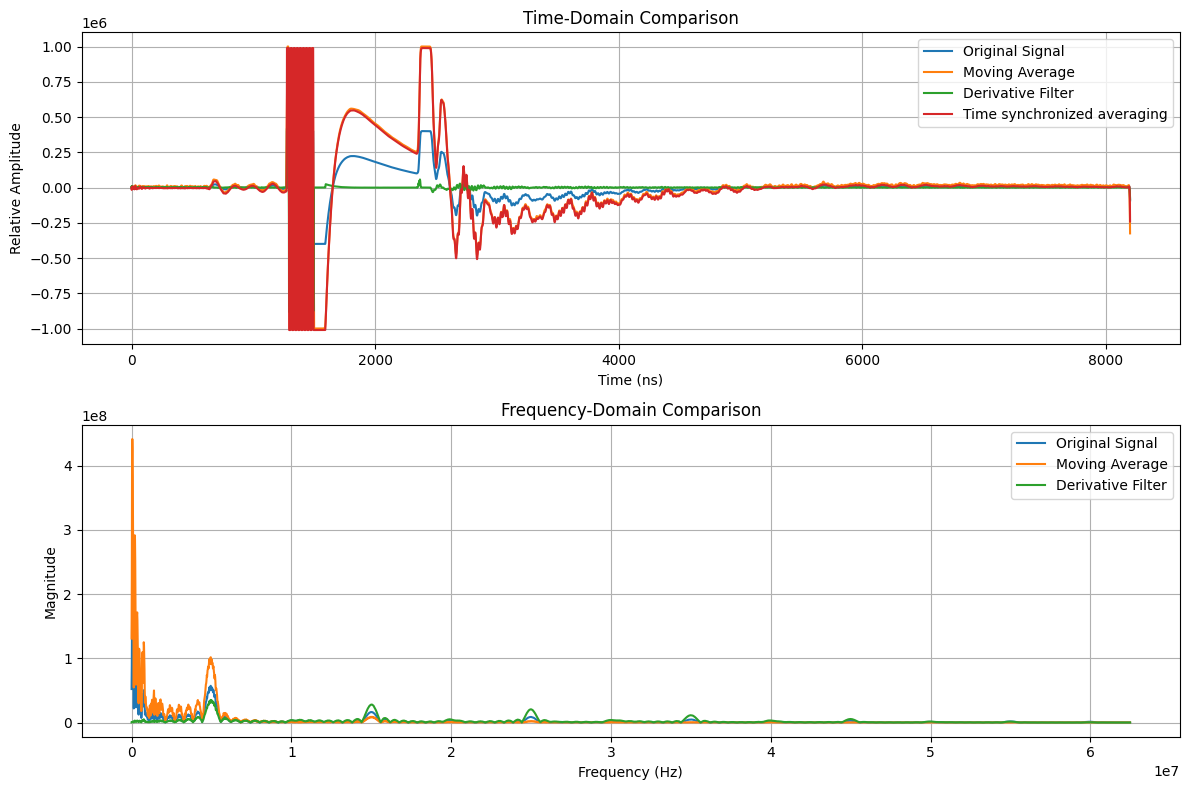

In [115]:
start=0
end=8200
# Extract the original signal for channel 2 and average across trials
signal = np.mean(raw[:, 1, :], axis=0)  # Shape: [16000], averaged over 100 trials
print("signal: ", signal.shape)

# Time axis (64000 to 65400 ns, matching your plot)
time = np.arange(start, end)  # Length: 1401

# Slice the signal and filtered data to match the time range (1401 samples)
signal = signal[start:end]  # Shape: [1401]
ma_filtered = filtered_uniform_moving_avg[0, start:end]  # Shape: [1401], from [1, 16000]
deriv_filtered = filtered_derivative[0,1, start:end]  # Shape: [1401], assuming [1, 16000]
averaged_signal=averaged_signal[0][start:end]


# Compute FFT and frequency axis
n_samples = len(signal)  # 1401 samples
sampling_rate =125e6  # 125 MHz

freq_axis = fftfreq(n_samples, d=1/sampling_rate)[:n_samples//2]
signal_fft = np.abs(fft(signal))[:n_samples//2]
ma_fft = np.abs(fft(ma_filtered))[:n_samples//2]
deriv_fft = np.abs(fft(deriv_filtered))[:n_samples//2]

# Plot time-domain comparison
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(time, signal, label="Original Signal")
plt.plot(time, ma_filtered, label="Moving Average")
plt.plot(time, deriv_filtered, label="Derivative Filter")

plt.plot(time, averaged_signal, label="Time synchronized averaging")
plt.title("Time-Domain Comparison")
plt.xlabel("Time (ns)")
plt.ylabel("Relative Amplitude")
plt.legend()
plt.grid()

# Plot frequency-domain comparison
plt.subplot(2, 1, 2)
plt.plot(freq_axis, signal_fft, label="Original Signal")
plt.plot(freq_axis, ma_fft, label="Moving Average")
plt.plot(freq_axis, deriv_fft, label="Derivative Filter")
plt.title("Frequency-Domain Comparison")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

#### Statistical testing

In [116]:
import numpy as np
from scipy.stats import skew, kurtosis

# Replace with your actual data
your_data = raw[0,1,6000:10000]  # Simulated data; replace with your signal

mean = np.mean(your_data)
std = np.std(your_data)
skewness = skew(your_data)
kurt = kurtosis(your_data)

print(f"Mean: {mean:.3f}, Std: {std:.3f}, Skewness: {skewness:.3f}, Kurtosis: {kurt:.3f}")

Mean: 12963.312, Std: 252567.992, Skewness: -0.146, Kurtosis: 10.446


# independednt component analysis ECA
# empirical mode decomposition EMD
